Please provide your names, last names, and student IDs. 

* name 1, last name 1, student id 1
* name 2, last name 2, student id 2 (when working in a pair)

# CLUSTERING

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

## Part 1

In [1]:
### SOME IMPORTS
import common as cm  ### this file is included in the bundle lab1.zip
import numpy as np
import matplotlib.pyplot as plt

1.1) Complete the following distance function

In [2]:
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    c = np.linalg.norm(np.array(A)-np.array(B))
    return c
### TEST - verify the correctness
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

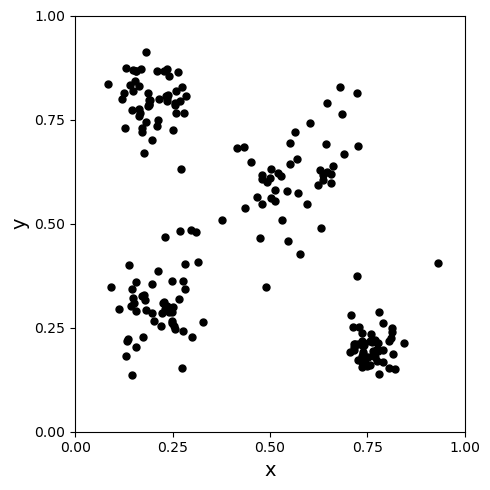

In [3]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**QUESTION: How many clusters (groups) do you see here? Answer : 4**

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

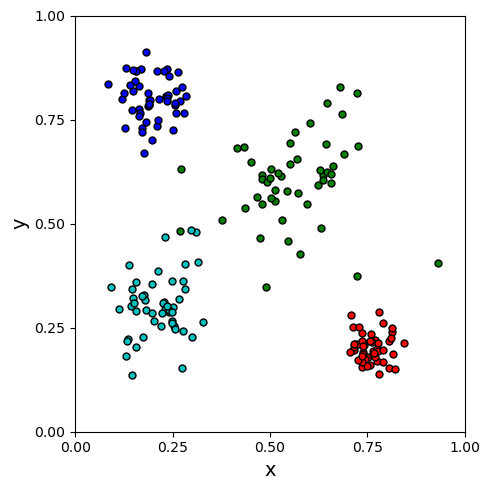

In [4]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [5]:
from numpy import random
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    l = []
    while K > 0:
        np.random.shuffle(data)
        l.append(data[0])
        K -= 1
    return l
    
# TEST
print(getCentroids(2, data))

[[0.17573311426478827, 0.32792236516590445], [0.17880843774074887, 0.3175686188856597]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [6]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):
    NO_CHANGE = True
    if ASSIGNMENTS is None: NO_CHANGE = False
    #TODO
    NEW_CENTROIDS = []
    DATAA = []
    ### CONSTRUCT NEW ASSIGNMENTS
    ### TODO
    NEW_ASSIGNMENTS = [[] for d in range(K)]
    for f in range(len(DATA)):
        ASSIGNMENTS = []
        for m in range(K):
            ASSIGNMENTS.append(getEuclideanDistance(DATA[f], CENTROIDS[m]))
        smallestdistanceindex = ASSIGNMENTS.index(min(ASSIGNMENTS))
        NEW_ASSIGNMENTS[smallestdistanceindex].append(f)        
    NEW_ASSIGNMENTS = np.array(NEW_ASSIGNMENTS, dtype=object)
    ### CONSTRUCT NEW CENTROIDS
    for q in NEW_ASSIGNMENTS:
        for c in q:
            DATAA.append(DATA[c])
        NEW_CENTROIDS.append(np.mean(DATAA, axis=0))
        DATAA = []
    ### TODO
    NO_CHANGE = np.array_equal(ASSIGNMENTS, NEW_ASSIGNMENTS)
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS

doKMeansStep(data, 0, 2, getCentroids(2, data), [])

(False,
 [array([0.47449846, 0.42340585]), array([0.16489217, 0.82223708])],
 array([list([1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 159, 160, 161, 162, 164, 167, 168, 169, 170, 171, 173, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199]),
        list([0, 7, 10, 17, 19, 33, 44, 63, 70, 84, 90, 92, 97, 99, 115, 135, 141, 153, 154, 158, 163, 165, 166, 172, 174, 177, 195])],


1.6) The below code performs 1 iteration of K-Means algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

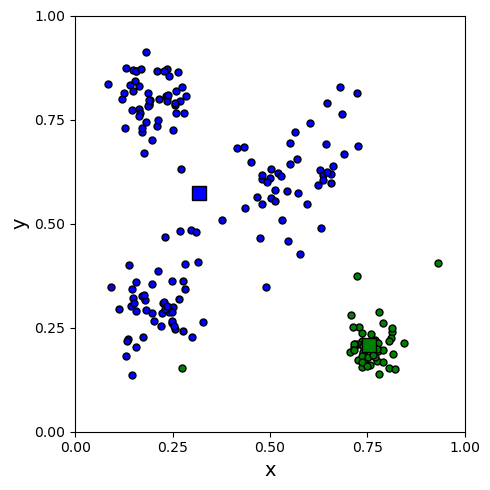

In [7]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

In [13]:
def doKMeans(DATA, CENTROIDS, K = 2):
    ASSIGNMENTS = [[] for i in range(K)]
    M = 0
    for i in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        M += 1
#     print("The process has stopped after", len(NEW_ASSIGNMENTS), "iterations")
    return DATA, CENTROIDS, ASSIGNMENTS
    

DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = 2)
cm.displayDataSet(plt, DATA, centroids = NEW_CENTROIDS, assignments = NEW_ASSIGNMENTS)

NameError: name 'NEW_CENTROIDS' is not defined

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice? Answer: K = 4

In [ ]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    print("K =", k)
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
    cm.displayDataSet(plt, DATA, centroids = NEW_CENTROIDS, assignments = NEW_ASSIGNMENTS)    

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **QUESTION: Find the "elbow" -> for which K is the assignment the best?**

In [ ]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    #TODO
    distance = [0.0 for i in range(len(DATA))]
    paired = zip(ASSIGNMENTS, CENTROIDS)
    for p1, p2 in paired:
        for j in p1:
            distance[j] = getEuclideanDistance(DATA[distance], p2)
            
            res.append([k,res])
    return sum(distance), res

In [ ]:
### PERFORM THE ANALYSIS HERE
DATA = cm.getTestDataSet()
res = getTotalDistance(DATA,NEW_CENTROIDS,NEW_ASSIGNMENTS)
# res = getTotalDistance(DATA,NEW_CENTROIDS,NEW_ASSIGNMENTS)
# res.append([k,res])
cm.displayResults(plt, res)

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Firstly, load the data. Secondly, check the min and max values for each attribute and consider normalization. Thirdly, run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. Fourthly, identify the best K using the performance indicator introduced in Part 2. Lastly - for the best K - analyze constructed clusters. Your can, e.g., generate distribution plots or simply compute mean attribute values within each cluster. For this reason, you can use centroids constructed in the final iteration. **Task: Characterize/describe the clusters**.

In [ ]:
DATA = cm.getCaseDataSet()

In [ ]:
### CONSIDER NORMALIZATION HERE

In [ ]:
 def doKMeans_CaseStudy(DATA, K = 2, M = 5):
    CENTROIDS = getCentroids(K, DATA) # GET CENTOIDS
    ASSIGNMENTS = [[] for i in range(K)] # 
    ### TODO
    return DATA, CENTROIDS, ASSIGNMENTS 

DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(DATA_N, K = 2)

In [ ]:
### DO THE ANALYSIS HERE (FIND ELBOW)

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

In [ ]:
### DISPLAY - SUMMARIZE - STATS FOR THE BEST K FOUND IN THE PREVIOUS STEP